In [1]:
%matplotlib_svg
import numpy as np

# NumPy-快速处理数据

In [26]:
import numpy
numpy.__version__

'1.9.0'

## `ndarray`对象

In [27]:
import numpy as np

### 创建

In [28]:
a = np.array([1, 2, 3, 4])
b = np.array((5, 6, 7, 8))
c = np.array([[1, 2, 3, 4], [4, 5, 6, 7], [7, 8, 9, 10]])
%C b; c

     b                c         
------------  ------------------
[5, 6, 7, 8]  [[ 1,  2,  3,  4],
               [ 4,  5,  6,  7],
               [ 7,  8,  9, 10]]


In [29]:
%C a.shape; b.shape; c.shape

a.shape  b.shape  c.shape
-------  -------  -------
(4,)     (4,)     (3, 4) 


In [30]:
c.shape = 4, 3
c

array([[ 1,  2,  3],
       [ 4,  4,  5],
       [ 6,  7,  7],
       [ 8,  9, 10]])

In [31]:
c.shape = 2, -1
c

array([[ 1,  2,  3,  4,  4,  5],
       [ 6,  7,  7,  8,  9, 10]])

In [32]:
d = a.reshape((2,2)) # 也可以用a.reshape(2,2)
%C d; a

   d           a      
--------  ------------
[[1, 2],  [1, 2, 3, 4]
 [3, 4]]              


In [33]:
a[1] = 100 # 将数组a的第1个元素改为100
%C a; d

         a                 d      
--------------------  ------------
[  1, 100,   3,   4]  [[  1, 100],
                       [  3,   4]]


### 元素类型

In [34]:
c.dtype

dtype('int32')

In [35]:
ai32 = np.array([1, 2, 3, 4], dtype=np.int32)
af = np.array([1, 2, 3, 4], dtype=float)
ac = np.array([1, 2, 3, 4], dtype=complex)
%C ai32.dtype; af.dtype; ac.dtype

  ai32.dtype        af.dtype            ac.dtype     
--------------  ----------------  -------------------
dtype('int32')  dtype('float64')  dtype('complex128')


In [36]:
[key for key, value in list(np.typeDict.items()) if value is np.float64]

[12, 'd', 'float64', 'float_', 'float', 'f8', 'double', 'Float64']

In [37]:
%col 4 set(np.typeDict.values())

{numpy.bool_,          numpy.object_,        numpy.string_,        numpy.unicode_,      
 numpy.void,           numpy.int8,           numpy.int16,          numpy.int32,         
 numpy.int32,          numpy.int64,          numpy.uint8,          numpy.uint16,        
 numpy.uint32,         numpy.uint32,         numpy.uint64,         numpy.float16,       
 numpy.float32,        numpy.float64,        numpy.float64,        numpy.datetime64,    
 numpy.timedelta64,    numpy.complex64,      numpy.complex128,     numpy.complex128}    


In [38]:
c.dtype.type

numpy.int32

In [39]:
a = np.int16(200)
a*a

-25536

In [17]:
v1 = 3.14
v2 = np.float64(v1)
%timeit v1*v1
%timeit v2*v2

10000000 loops, best of 3: 70.1 ns per loop
10000000 loops, best of 3: 178 ns per loop


In [ ]:
t1 = np.array([1, 2, 3, 4], dtype=np.float)
t2 = np.array([1, 2, 3, 4], dtype=np.complex)
t3 = t1.astype(np.int32)
t4 = t2.astype(np.complex64)

### 自动生成数组

In [41]:
np.arange(0, 1, 0.1)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])

In [42]:
np.linspace(0, 1, 10) # 步长为1/9

array([ 0.        ,  0.11111111,  0.22222222,  0.33333333,  0.44444444,
        0.55555556,  0.66666667,  0.77777778,  0.88888889,  1.        ])

In [43]:
np.linspace(0, 1, 10, endpoint=False) # 步长为1/10

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])

In [44]:
np.logspace(0, 2, 5)

array([   1.        ,    3.16227766,   10.        ,   31.6227766 ,  100.        ])

In [45]:
np.logspace(0, 1, 12, base=2, endpoint=False)

array([ 1.        ,  1.05946309,  1.12246205,  1.18920712,  1.25992105,
        1.33483985,  1.41421356,  1.49830708,  1.58740105,  1.68179283,
        1.78179744,  1.88774863])

In [46]:
np.empty((2,3), np.int)

array([[1078523331, 1065353216, 1073741824],
       [1077936128, 1082130432, 1084227584]])

In [47]:
np.zeros(4, np.int)

array([0, 0, 0, 0])

In [2]:
np.full(4, np.pi)

array([ 3.14159265,  3.14159265,  3.14159265,  3.14159265])

In [48]:
s = "abcdefgh"

In [49]:
np.fromstring(s, dtype=np.int8)

array([ 97,  98,  99, 100, 101, 102, 103, 104], dtype=int8)

In [50]:
print((98*256+97))
np.fromstring(s, dtype=np.int16)

25185


array([25185, 25699, 26213, 26727], dtype=int16)

In [51]:
np.fromstring(s, dtype=np.float)

array([  8.54088322e+194])

In [52]:
buf = np.frombuffer(s, dtype=np.int16)
buf[1] = 10

ValueError: assignment destination is read-only

In [53]:
def func(i):
    return i % 4 + 1

np.fromfunction(func, (10,))

array([ 1.,  2.,  3.,  4.,  1.,  2.,  3.,  4.,  1.,  2.])

In [54]:
def func2(i, j):
    return (i + 1) * (j + 1)
np.fromfunction(func2, (9,9))

array([[  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
       [  2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.],
       [  3.,   6.,   9.,  12.,  15.,  18.,  21.,  24.,  27.],
       [  4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.],
       [  5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.],
       [  6.,  12.,  18.,  24.,  30.,  36.,  42.,  48.,  54.],
       [  7.,  14.,  21.,  28.,  35.,  42.,  49.,  56.,  63.],
       [  8.,  16.,  24.,  32.,  40.,  48.,  56.,  64.,  72.],
       [  9.,  18.,  27.,  36.,  45.,  54.,  63.,  72.,  81.]])

### 存取元素

In [55]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [56]:
%C 4 a[5]; a[3:5]; a[:5]; a[:-1]

a[5]    a[3:5]         a[:5]                    a[:-1]          
----    ------    ---------------    ---------------------------
5       [3, 4]    [0, 1, 2, 3, 4]    [0, 1, 2, 3, 4, 5, 6, 7, 8]


In [57]:
%C 4 a[1:-1:2]; a[::-1]; a[5:1:-2]

 a[1:-1:2]                 a[::-1]                a[5:1:-2]
------------    ------------------------------    ---------
[1, 3, 5, 7]    [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]    [5, 3]   


In [58]:
a[2:4] = 100, 101
a

array([  0,   1, 100, 101,   4,   5,   6,   7,   8,   9])

In [59]:
b = a[3:7] # 通过切片产生一个新的数组b，b和a共享同一块数据存储空间
b[2] = -10 # 将b的第2个元素修改为-10
%C b; a

         b                                    a                         
--------------------  --------------------------------------------------
[101,   4, -10,   6]  [  0,   1, 100, 101,   4, -10,   6,   7,   8,   9]


In [60]:
x = np.arange(10, 1, -1)
x

array([10,  9,  8,  7,  6,  5,  4,  3,  2])

In [61]:
a = x[[3, 3, 1, 8]]
b = x[[3, 3, -3, 8]]
%C a; b

     a             b      
------------  ------------
[7, 7, 9, 2]  [7, 7, 4, 2]


In [62]:
b[2] = 100
%C b; x

         b                             x                  
--------------------  ------------------------------------
[  7,   7, 100,   2]  [10,  9,  8,  7,  6,  5,  4,  3,  2]


In [63]:
x[[3,5,1]] = -1, -2, -3
x

array([10, -3,  8, -1,  6, -2,  4,  3,  2])

In [64]:
x = np.arange(10,1,-1)
x[np.array([3,3,1,8])] 

array([7, 7, 9, 2])

In [65]:
x[np.array([[3,3,1,8],[3,3,-3,8]])] 

array([[7, 7, 9, 2],
       [7, 7, 4, 2]])

In [66]:
x[[3,3,1,8,3,3,-3,8]].reshape(2,4) # 改变数组形状

array([[7, 7, 9, 2],
       [7, 7, 4, 2]])

In [67]:
x = np.arange(5,0,-1)
x

array([5, 4, 3, 2, 1])

In [68]:
x[np.array([True, False, True, False, False])] 

array([5, 3])

In [69]:
x[[True, False, True, False, False]] 

-c:1: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


array([4, 5, 4, 5, 5])

> **WARNING**

> 在NumPy 1.10之后的版本中布尔列表会被当作布尔数组，因此上面的运行结果会变成`array([5, 3])`。

In [70]:
x[np.array([True, False, True, True])] 

array([5, 3, 2])

In [71]:
x[np.array([True, False, True, True])] = -1, -2, -3 
x

array([-1,  4, -2, -3,  1])

In [72]:
x = np.random.randint(0, 10, 6) # 产生一个长度为6，元素值为0到9的随机整数数组
%C x; x > 5

        x                             x > 5                   
------------------  ------------------------------------------
[8, 1, 5, 6, 2, 7]  [ True, False, False,  True, False,  True]


In [73]:
x[x > 5]

array([8, 6, 7])

### 多维数组

In [74]:
a = np.arange(0, 60, 10).reshape(-1, 1) + np.arange(0, 6)
a

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

In [75]:
%C a[0, 3:5]; a[4:, 4:]; a[:, 2]; a[2::2, ::2]

a[0, 3:5]  a[4:, 4:]           a[:, 2]            a[2::2, ::2] 
---------  ----------  ------------------------  --------------
[3, 4]     [[44, 45],  [ 2, 12, 22, 32, 42, 52]  [[20, 22, 24],
            [54, 55]]                             [40, 42, 44]]


In [76]:
b = a[0, 3:5]
b[0] = -b[0]
a[0, 3:5]

array([-3,  4])

In [77]:
idx = slice(None, None, 2), slice(2,None)
%C a[idx]; a[idx][idx]

      a[idx]        a[idx][idx]
------------------  -----------
[[ 2, -3,  4,  5],  [[ 4,  5], 
 [22, 23, 24, 25],   [44, 45]] 
 [42, 43, 44, 45]]             


In [78]:
np.s_[::2, 2:]

(slice(None, None, 2), slice(2, None, None))

In [79]:
a[(0,1,2,3),(1,2,3,4)]

array([ 1, 12, 23, 34])

In [80]:
a[3:, [0,2,5]]

array([[30, 32, 35],
       [40, 42, 45],
       [50, 52, 55]])

In [81]:
mask = np.array([1,0,1,0,0,1], dtype=np.bool)
a[mask, 2]

array([ 2, 22, 52])

In [82]:
mask1 = np.array([1,0,1,0,0,1])
mask2 = [True,False,True,False,False,True]
%C a[mask1, 2]; a[mask2, 2]

      a[mask1, 2]               a[mask2, 2]       
------------------------  ------------------------
[12,  2, 12,  2,  2, 12]  [12,  2, 12,  2,  2, 12]


In [83]:
%C a[[1,2],:]; a[[1,2]]

        a[[1,2],:]                   a[[1,2]]         
--------------------------  --------------------------
[[10, 11, 12, 13, 14, 15],  [[10, 11, 12, 13, 14, 15],
 [20, 21, 22, 23, 24, 25]]   [20, 21, 22, 23, 24, 25]]


In [84]:
x = np.array([[0,1],[2,3]])
y = np.array([[-1,-2],[-3,-4]])
a[x,y]

array([[ 5, 14],
       [23, 32]])

In [85]:
a[(0,1,2,3),(-1,-2,-3,-4)].reshape(2,2)

array([[ 5, 14],
       [23, 32]])

In [86]:
a[x]

array([[[ 0,  1,  2, -3,  4,  5],
        [10, 11, 12, 13, 14, 15]],

       [[20, 21, 22, 23, 24, 25],
        [30, 31, 32, 33, 34, 35]]])

In [87]:
palette = np.array( [ [0,0,0],                
                      [255,0,0],              
                      [0,255,0],              
                      [0,0,255],              
                      [255,255,255] ] )       
image = np.array( [ [ 0, 1, 2, 0 ],           
                    [ 0, 3, 4, 0 ]  ] )
palette[image]

array([[[  0,   0,   0],
        [255,   0,   0],
        [  0, 255,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0, 255],
        [255, 255, 255],
        [  0,   0,   0]]])

### 结构数组

In [3]:
persontype = np.dtype({ #❶
    'names':['name', 'age', 'weight'],
    'formats':['S30','i', 'f']}, align=True)
a = np.array([("Zhang", 32, 75.5), ("Wang", 24, 65.2)], #❷
    dtype=persontype)

In [4]:
a.dtype

dtype({'names':['name','age','weight'], 'formats':['S30','<i4','<f4'], 'offsets':[0,32,36], 'itemsize':40}, align=True)

In [5]:
print((a[0]))
a[0].dtype

('Zhang', 32, 75.5)


dtype({'names':['name','age','weight'], 'formats':['S30','<i4','<f4'], 'offsets':[0,32,36], 'itemsize':40}, align=True)

In [6]:
a[0]["name"]

'Zhang'

In [7]:
c = a[1]
c["name"] = "Li"
a[1]["name"]

'Li'

In [8]:
b=a["age"]
b[0] = 40
print((a[0]["age"]))

40


In [94]:
a.tofile("test.bin")

In [9]:
%%file read_struct_array.c
#include <stdio.h>

struct person 
{
    char name[30];
    int age;
    float weight;
};

struct person p[3];

void main ()
{
    FILE *fp;
    int i;
    fp=fopen("test.bin","rb");
    fread(p, sizeof(struct person), 2, fp);
    fclose(fp);
    for(i=0;i<2;i++)
    {
        printf("%s %d %f\n", p[i].name, p[i].age, p[i].weight);
    }
}

Overwriting read_struct_array.c


In [10]:
!gcc read_struct_array.c -o read_struct_array.exe
!read_struct_array.exe

Zhang 40 75.500000
Li 24 65.199997


In [95]:
np.dtype([('f1', [('f2', np.int16)])])

dtype([('f1', [('f2', '<i2')])])

In [96]:
np.dtype([('f0', 'i4'), ('f1', 'f8', (2, 3))])

dtype([('f0', '<i4'), ('f1', '<f8', (2, 3))])

In [97]:
np.dtype({'surname':('S25',0),'age':(np.uint8,25)})

dtype([('surname', 'S25'), ('age', 'u1')])

### 内存结构

In [98]:
a = np.array([[0,1,2],[3,4,5],[6,7,8]], dtype=np.float32)

In [99]:
b = a[::2, ::2]
%C b; b.strides

     b        b.strides
------------  ---------
[[ 0.,  2.],  (24, 8)  
 [ 6.,  8.]]           


In [100]:
c = np.array([[0,1,2],[3,4,5],[6,7,8]], dtype=np.float32, order="F")
c.strides

(4, 12)

In [101]:
print((a.flags))
print(("c_contiguous:", a.flags.c_contiguous))

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False
c_contiguous: True


In [102]:
a.T.flags

  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False

In [103]:
b.flags

  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False

In [104]:
%C id(b.base); id(a)

id(b.base)    id(a)  
----------  ---------
119627272   119627272


In [11]:
a = np.array([[0, 1], [2, 3], [4, 5]], dtype=np.float32)
b = a.view(np.uint32)
c = a.view(np.uint8)
%C 2 b; c

            b                                   c                     
--------------------------  ------------------------------------------
[[         0, 1065353216],  [[  0,   0,   0,   0,   0,   0, 128,  63],
 [1073741824, 1077936128],   [  0,   0,   0,  64,   0,   0,  64,  64],
 [1082130432, 1084227584]]   [  0,   0, 128,  64,   0,   0, 160,  64]]


In [12]:
a[0, 0] = 3.14
%C 2 b[0, 0]; c[0, :4]

 b[0, 0]          c[0, :4]      
----------  --------------------
1078523331  [195, 245,  72,  64]


> **LINK**

> http://zh.wikipedia.org/wiki/平方根倒数速算法

> 维基百科关于雷神之锤中使用`0x5f3759df`计算平方根倒数算法的解释

In [107]:
number = np.linspace(0.1, 10, 100)
y = number.astype(np.float32)  #❶
x2 = y * 0.5
i = y.view(np.int32)  #❷
i[:] = 0x5f3759df - (i >> 1)  #❸
y = y * (1.5 - x2 * y * y)  #❹
np.max(np.abs(1 / np.sqrt(number) - y))  #❺

0.0050456140410597428

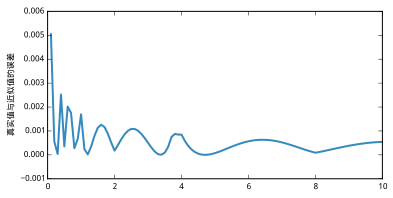

In [114]:
#%figonly=雷神之锤中计算平方根倒数算法的绝对误差
import pylab as pl
pl.plot(number, 1/np.sqrt(number) - y, lw=2)
pl.ylabel("真实值与近似值的误差");

In [111]:
from numpy.lib.stride_tricks import as_strided
a = np.arange(6)
b = as_strided(a, shape=(4, 3), strides=(4, 4))
%C a; b

        a                b     
------------------  -----------
[0, 1, 2, 3, 4, 5]  [[0, 1, 2],
                     [1, 2, 3],
                     [2, 3, 4],
                     [3, 4, 5]]


In [112]:
a[2] = 20
b

array([[ 0,  1, 20],
       [ 1, 20,  3],
       [20,  3,  4],
       [ 3,  4,  5]])